In [42]:
# Lab 1 (Exploring Digital Sampling, Fourier Transforms, and both DSB and SSB Mixers), Due Feb 6, 11:59 pm
# Report by Olivia Wagner

In [43]:
# import packages for plotting and analyzing data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal
from scipy.signal import correlate, correlation_lags

In [129]:
# 5.3.1 Sampling with an SDR and a Raspberry Pi
    # Capturing data at various sample rates

# Data at a constant sample rate 1.0e6 Hz and constant amplitude 2.5 mV

# ———————————————————— Nyquist Zone 0 ————————————————————
with np.load("Z0_150kHz.npz") as data:
    # print(data.files)
    Z0_150 = data['arr_0']
    # print(Z0_150)
    
with np.load("Z0_250kHz.npz") as data:
    # print(data.files)
    Z0_250 = data['arr_0']
    # print(Z0_250)

with np.load("Z0_350kHz.npz") as data:
    # print(data.files)
    Z0_350 = data['arr_0']
    # print(Z0_350)

# ———————————————————— Nyquist Zone 1 ————————————————————
with np.load("Z1_650kHz.npz") as data:
    # print(data.files)
    Z1_650 = data['arr_0']
    # print(Z1_650)
    
with np.load("Z1_750kHz.npz") as data:
    # print(data.files)
    Z1_750 = data['arr_0']
    # print(Z1_750)

with np.load("Z1_850kHz.npz") as data:
    # print(data.files)
    Z1_850 = data['arr_0']
    # print(Z1_850)

# ———————————————————— Nyquist Zone 2 ————————————————————
with np.load("Z2_1150kHz.npz") as data:
    # print(data.files)
    Z2_1150 = data['arr_0']
    # print(Z2_1150)
    
with np.load("Z2_1250kHz.npz") as data:
    # print(data.files)
    Z2_1250 = data['arr_0']
    # print(Z2_1250)

with np.load("Z2_1350kHz.npz") as data:
    # print(data.files)
    Z2_1350 = data['arr_0']
    # print(Z2_1350)

# ———————————————————— Nyquist Zone 3 ————————————————————
with np.load("Z3_1650kHz.npz") as data:
    # print(data.files)
    Z3_1650 = data['arr_0']
    # print(Z3_1650)
    
with np.load("Z3_1750kHz.npz") as data:
    # print(data.files)
    Z3_1750 = data['arr_0']
    # print(Z3_1750)

with np.load("Z3_1850kHz.npz") as data:
    # print(data.files)
    Z3_1850 = data['arr_0']
    # print(Z3_1850)

with np.load("L5.6_250kHz.npz") as data:
    # print(data.files)
    Two_Func_Gen1 = data['arr_0']
    # print(Two_Func_Gen1)

with np.load("L5.6_250kHz_Closer.npz") as data:
    # print(data.files)
    Two_Func_Gen2 = data['arr_0']
    # print(Two_Func_Gen2)

with np.load("L5.6_250kHz_Farther.npz") as data:
    # print(data.files)
    Two_Func_Gen3 = data['arr_0']
    # print(Two_Func_Gen3)

with np.load("L5.6_250kHz_Closer_1024N.npz") as data:
    # print(data.files)
    Two_Func_Gen4 = data['arr_0']
    # print(Two_Func_Gen4)

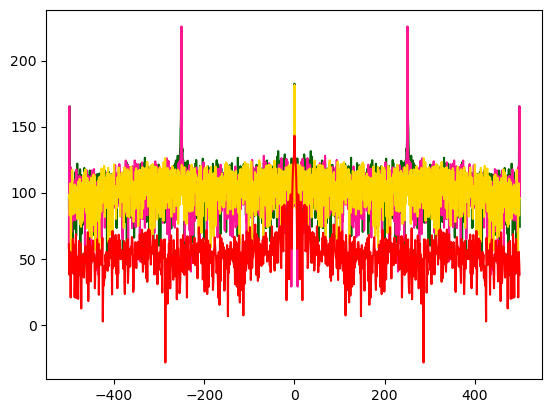

In [133]:
# Power Spectrum for Two Function Generators

Xf_2Func_a = np.fft.fft(Two_Func_Gen1[1]) # Frequency bins
Xf_2Func_b = np.fft.fft(Two_Func_Gen2[1]) # Frequency bins
Xf_2Func_c = np.fft.fft(Two_Func_Gen3[1]) # Frequency bins
Xf_2Func_d = np.fft.fft(Two_Func_Gen4[1]) # Frequency bins

# 10*np.log(P_)
Freq_a = np.fft.fftfreq(len(Xf_2Func_a), d=dt)
Freq_b = np.fft.fftfreq(len(Xf_2Func_b), d=dt)
Freq_c = np.fft.fftfreq(len(Xf_2Func_c), d=dt)
Freq_d = np.fft.fftfreq(len(Xf_2Func_d), d=dt)

S_freq_a = np.fft.fftshift(Freq_a)
S_freq_b = np.fft.fftshift(Freq_b)
S_freq_c = np.fft.fftshift(Freq_c)
S_freq_d = np.fft.fftshift(Freq_d)

P_a  = np.abs(Xf_2Func_a)**2
P_b  = np.abs(Xf_2Func_b)**2
P_c  = np.abs(Xf_2Func_c)**2
P_d  = np.abs(Xf_2Func_d)**2

S_p_a = np.fft.fftshift(P_a)
S_p_b = np.fft.fftshift(P_b)
S_p_c = np.fft.fftshift(P_c)
S_p_d = np.fft.fftshift(P_d)

plt.plot(S_freq_a / 1e3, 10*np.log(S_p_a), color='darkgreen')
plt.plot(S_freq_b / 1e3, 10*np.log(S_p_b), color='deeppink')
plt.plot(S_freq_c / 1e3, 10*np.log(S_p_c), color='gold')
# plt.plot(S_freq_d / 1e3, 10*np.log(S_p_d), color='red')
    # Bad data?

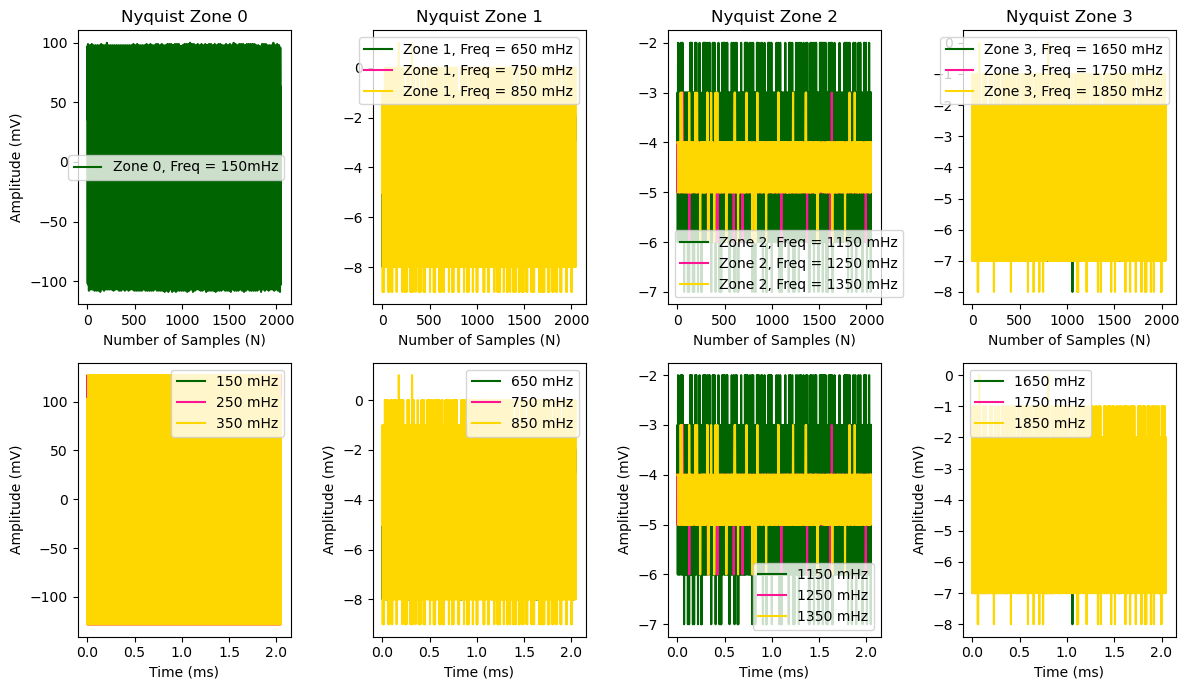

In [91]:
fig, axes = plt.subplots(2, 4, figsize=(12, 7), sharey=False, sharex=False)

# AMPLITUDE VS SAMPLE RATE

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(Z0_150[1], color='darkgreen', label="Zone 0, Freq = 150mHz")
ax.plot(Z0_250[1], color='deeppink', label="Zone 0, Freq = 250mHz")
ax.plot(Z0_350[1], color='gold', label="Zone 0, Freq = 350mHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Number of Samples (N)')
ax.set_title('Nyquist Zone 0')
ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(Z1_650[1], color='darkgreen', label="Zone 1, Freq = 650 mHz")
ax.plot(Z1_750[1], color='deeppink', label="Zone 1, Freq = 750 mHz")
ax.plot(Z1_850[1], color='gold', label="Zone 1, Freq = 850 mHz")
# ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Number of Samples (N)')
ax.set_title('Nyquist Zone 1')
ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[0, 2]
ax.plot(Z2_1150[1], color='darkgreen', label="Zone 2, Freq = 1150 mHz")
ax.plot(Z2_1250[1], color='deeppink', label="Zone 2, Freq = 1250 mHz")
ax.plot(Z2_1350[1], color='gold', label="Zone 2, Freq = 1350 mHz")
# ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Number of Samples (N)')
ax.set_title('Nyquist Zone 2')
ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[0, 3]
ax.plot(Z3_1650[1], color='darkgreen', label="Zone 3, Freq = 1650 mHz")
ax.plot(Z3_1750[1], color='deeppink', label="Zone 3, Freq = 1750 mHz")
ax.plot(Z3_1850[1], color='gold', label="Zone 3, Freq = 1850 mHz")
# ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Number of Samples (N)')
ax.set_title('Nyquist Zone 3')
ax.legend()
# ax.show()

# Zoom first row to first 30 samples
for ax in axes[0, :]:
    ax.set_xlim(0, 30)
    
# Zoom second row to 0.10 miliseconds
for ax in axes[1, :]:
    ax.set_xlim(0, 0.10)

# AMPLITUDE VS TIME
    # Sample Rate to Time Conversion
def N2time(v, N): # Takes the length of the array for each sample rate and divides it by the sampling rate, giving time
    return np.arange(N) / v

# Sample Rate Conversion
sample_rate = 1.0e6
t_Z0_150 = N2time(sample_rate, len(Z0_150[1]))
t_Z0_250 = N2time(sample_rate, len(Z0_250[1]))
t_Z0_350 = N2time(sample_rate, len(Z0_350[1]))

t_Z1_650 = N2time(sample_rate, len(Z1_650[1]))
t_Z1_750 = N2time(sample_rate, len(Z1_750[1]))
t_Z1_850 = N2time(sample_rate, len(Z1_850[1]))

t_Z2_1150 = N2time(sample_rate, len(Z2_1150[1]))
t_Z2_1250 = N2time(sample_rate, len(Z2_1250[1]))
t_Z2_1350 = N2time(sample_rate, len(Z2_1350[1]))

t_Z3_1650 = N2time(sample_rate, len(Z3_1650[1]))
t_Z3_1750 = N2time(sample_rate, len(Z3_1750[1]))
t_Z3_1850 = N2time(sample_rate, len(Z3_1850[1]))

# # Maximum values in each array
# # Zone 0
# print(np.max(Z0_150[1]))
# print(np.max(Z0_250[1]))
# print(np.max(Z0_350[1]))

# # Zone 1
# print(np.max(Z1_650[1]))
# print(np.max(Z1_750[1]))
# print(np.max(Z1_850[1]))

# # Zone 2
# print(np.max(Z2_1150[1]))
# print(np.max(Z2_1250[1]))
# print(np.max(Z2_1350[1]))
 
# # Zone 3
# print(np.max(Z3_1650[1]))
# print(np.max(Z3_1750[1]))
# print(np.max(Z3_1850[1]))

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[1, 0]
ax.plot(t_Z0_150*1000, # Converting to the correct units of time, milliseconds
         Z0_150[1], color='darkgreen', label="150 mHz")
ax.plot(t_Z0_250*1000, Z0_250[1], color='deeppink', label="250 mHz")
ax.plot(t_Z0_350*1000, Z0_350[1], color='gold', label="350 mHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Time (ms)')
# ax.set_title('Nyquist Zone 0')
ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[1, 1]
ax.plot(t_Z1_650*1000, Z1_650[1], color='darkgreen', label="650 mHz")
ax.plot(t_Z1_750*1000, Z1_750[1], color='deeppink', label="750 mHz")
ax.plot(t_Z1_850*1000, Z1_850[1], color='gold', label="850 mHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Time (ms)')
# ax.set_title('Nyquist Zone 1')
ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 2]
ax.plot(t_Z2_1150*1000, Z2_1150[1], color='darkgreen', label="1150 mHz")
ax.plot(t_Z2_1250*1000, Z2_1250[1], color='deeppink', label="1250 mHz")
ax.plot(t_Z2_1350*1000, Z2_1350[1], color='gold', label="1350 mHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Time (ms)')
# ax.set_title('Nyquist Zone 2')
ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 3]
ax.plot(t_Z3_1650*1000, Z3_1650[1], color='darkgreen', label="1650 mHz")
ax.plot(t_Z3_1750*1000, Z3_1750[1], color='deeppink', label="1750 mHz")
ax.plot(t_Z3_1850*1000, Z3_1850[1], color='gold', label="1850 mHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Time (ms)')
# ax.set_title('Nyquist Zone 3')
ax.legend()
# ax.show()

plt.tight_layout()
plt.show()

In [46]:
# Sample Rate to Time Conversion
def N2time(v, N): # Takes the length of the array for each sample rate and divides it by the sampling rate, giving time
    return np.arange(N) / v

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[1, 0]
ax.plot(t_Z0_150*1000, # Converting to the correct units of time, milliseconds
         Z0_150[1], color='darkgreen', label="150 mHz")
ax.plot(t_Z0_250*1000, Z0_250[1], color='deeppink', label="250 mHz")
ax.plot(t_Z0_350*1000, Z0_350[1], color='gold', label="350 mHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Time (ms)')
ax.set_title('Nyquist Zone 0')
ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[1, 1]
ax.plot(t_Z1_650*1000, Z1_650[1], color='darkgreen', label="650 mHz")
ax.plot(t_Z1_750*1000, Z1_750[1], color='deeppink', label="750 mHz")
ax.plot(t_Z1_850*1000, Z1_850[1], color='gold', label="850 mHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Time (ms)')
ax.set_title('Nyquist Zone 1')
ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 1]
ax.plot(t_Z2_1150*1000, Z2_1150[1], color='darkgreen', label="1150 mHz")
ax.plot(t_Z2_1250*1000, Z2_1250[1], color='deeppink', label="1250 mHz")
ax.plot(t_Z2_1350*1000, Z2_1350[1], color='gold', label="1350 mHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Time (ms)')
ax.set_title('Nyquist Zone 2')
ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(t_Z3_1650*1000, Z3_1650[1], color='darkgreen', label="1650 mHz")
ax.plot(t_Z3_1750*1000, Z3_1750[1], color='deeppink', label="1750 mHz")
ax.plot(t_Z3_1850*1000, Z3_1850[1], color='gold', label="1850 mHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_xlabel('Time (ms)')
ax.set_title('Nyquist Zone 3')
ax.legend()
# ax.show()

# Sample Rate Conversion
sample_rate = 1.0e6
t_Z0_150 = N2time(sample_rate, len(Z0_150[1]))
t_Z0_250 = N2time(sample_rate, len(Z0_250[1]))
t_Z0_350 = N2time(sample_rate, len(Z0_350[1]))

t_Z1_650 = N2time(sample_rate, len(Z1_650[1]))
t_Z1_750 = N2time(sample_rate, len(Z1_750[1]))
t_Z1_850 = N2time(sample_rate, len(Z1_850[1]))

t_Z2_1150 = N2time(sample_rate, len(Z2_1150[1]))
t_Z2_1250 = N2time(sample_rate, len(Z2_1250[1]))
t_Z2_1350 = N2time(sample_rate, len(Z2_1350[1]))

t_Z3_1650 = N2time(sample_rate, len(Z3_1650[1]))
t_Z3_1750 = N2time(sample_rate, len(Z3_1750[1]))
t_Z3_1850 = N2time(sample_rate, len(Z3_1850[1]))

# Maximum values in each array
# Zone 0
print(np.max(Z0_150[1]))
print(np.max(Z0_250[1]))
print(np.max(Z0_350[1]))

# Zone 1
print(np.max(Z1_650[1]))
print(np.max(Z1_750[1]))
print(np.max(Z1_850[1]))

# Zone 2
print(np.max(Z2_1150[1]))
print(np.max(Z2_1250[1]))
print(np.max(Z2_1350[1]))
 
# Zone 3
print(np.max(Z3_1650[1]))
print(np.max(Z3_1750[1]))
print(np.max(Z3_1850[1]))

100
127
127
-1
-3
1
-2
-3
-3
-1
-2
0


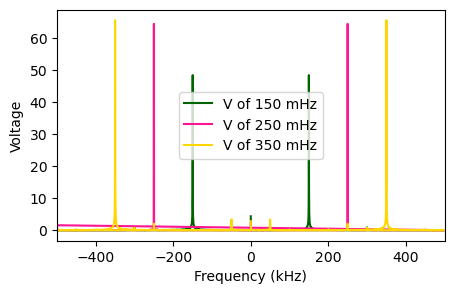

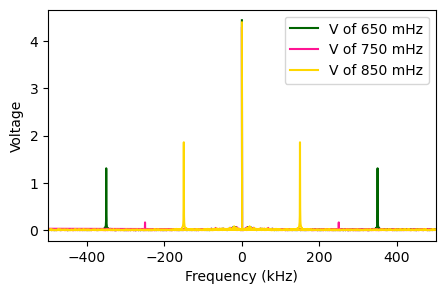

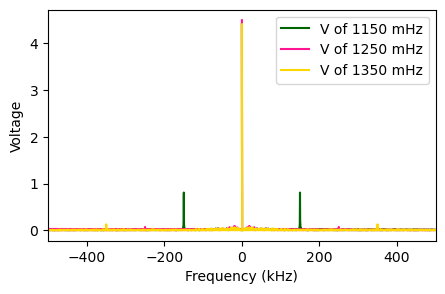

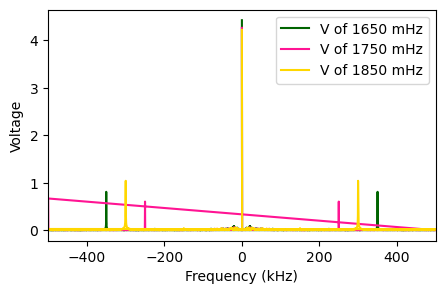

In [47]:
# Plotting the Voltage Spectrum

dt = 1 / sample_rate

# Zone 0
Xf_150 = np.fft.fft(Z0_150[1]) # Frequency bins
freq150 = np.fft.fftfreq(len(Z0_150[1]), d=dt) # Generates frequency values in each bin in Xf

Xf_250 = np.fft.fft(Z0_250[1])
freq250 = np.fft.fftfreq(len(Z0_250[1]), d=dt)

Xf_350 = np.fft.fft(Z0_350[1])
freq350 = np.fft.fftfreq(len(Z0_350[1]), d=dt)

# Zone 1
Xf_650 = np.fft.fft(Z1_650[1]) # Frequency bins
freq650 = np.fft.fftfreq(len(Z1_650[1]), d=dt) # Generates frequency values in each bin in Xf

Xf_750 = np.fft.fft(Z1_750[1])
freq750 = np.fft.fftfreq(len(Z1_750[1]), d=dt)

Xf_850 = np.fft.fft(Z1_850[1])
freq850 = np.fft.fftfreq(len(Z1_850[1]), d=dt)

# Zone 2
Xf_1150 = np.fft.fft(Z2_1150[1]) # Frequency bins
freq1150 = np.fft.fftfreq(len(Z2_1150[1]), d=dt) # Generates frequency values in each bin in Xf

Xf_1250 = np.fft.fft(Z2_1250[1])
freq1250 = np.fft.fftfreq(len(Z2_1250[1]), d=dt)

Xf_1350 = np.fft.fft(Z2_1350[1])
freq1350 = np.fft.fftfreq(len(Z2_1350[1]), d=dt)

# Zone 3
Xf_1650 = np.fft.fft(Z3_1650[1]) # Frequency bins
freq1650 = np.fft.fftfreq(len(Z3_1650[1]), d=dt) # Generates frequency values in each bin in Xf

Xf_1750 = np.fft.fft(Z3_1750[1])
freq1750 = np.fft.fftfreq(len(Z3_1750[1]), d=dt)

Xf_1850 = np.fft.fft(Z3_1850[1])
freq1850 = np.fft.fftfreq(len(Z3_1850[1]), d=dt)

# Computing voltage, the magnitude of each frequency bin
V_150 = np.abs(Xf_150) / len(Z0_150[1])
V_250 = np.abs(Xf_250) / len(Z0_250[1])
V_350 = np.abs(Xf_350) / len(Z0_350[1])

V_650 = np.abs(Xf_650) / len(Z1_650[1])
V_750 = np.abs(Xf_750) / len(Z1_750[1])
V_850 = np.abs(Xf_850) / len(Z1_850[1])

V_1150 = np.abs(Xf_1150) / len(Z2_1150[1])
V_1250 = np.abs(Xf_1250) / len(Z2_1250[1])
V_1350 = np.abs(Xf_1350) / len(Z2_1350[1])

V_1650 = np.abs(Xf_1650) / len(Z3_1650[1])
V_1750 = np.abs(Xf_1750) / len(Z3_1750[1])
V_1850 = np.abs(Xf_1850) / len(Z3_1850[1])

plt.figure(figsize=(5,3))
plt.plot(freq150 / 1e3, # Converting Hz to kilo Hz
         V_150, color='darkgreen', label="V of 150 mHz")
plt.plot(freq250 / 1e3, V_250, color='deeppink', label="V of 250 mHz")
plt.plot(freq350 / 1e3, V_350, color='gold', label="V of 350 mHz")
plt.xlabel('Frequency (kHz)')
plt.ylabel('Voltage')

plt.xlim(-500,500)
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(freq650 / 1e3, V_650, color='darkgreen', label="V of 650 mHz")
plt.plot(freq750 / 1e3, V_750, color='deeppink', label="V of 750 mHz")
plt.plot(freq850 / 1e3, V_850, color='gold', label="V of 850 mHz")

plt.xlabel('Frequency (kHz)')
plt.ylabel('Voltage')

plt.xlim(-500,500)
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(freq1150 / 1e3, V_1150, color='darkgreen', label="V of 1150 mHz")
plt.plot(freq1250 / 1e3, V_1250, color='deeppink', label="V of 1250 mHz")
plt.plot(freq1350 / 1e3, V_1350, color='gold', label="V of 1350 mHz")

plt.xlabel('Frequency (kHz)')
plt.ylabel('Voltage')

plt.xlim(-500,500)
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(freq1650 / 1e3, V_1650, color='darkgreen', label="V of 1650 mHz")
plt.plot(freq1750 / 1e3, V_1750, color='deeppink', label="V of 1750 mHz")
plt.plot(freq1850 / 1e3, V_1850, color='gold', label="V of 1850 mHz")

plt.xlabel('Frequency (kHz)')
plt.ylabel('Voltage')

plt.xlim(-500,500)
plt.legend()
plt.show()

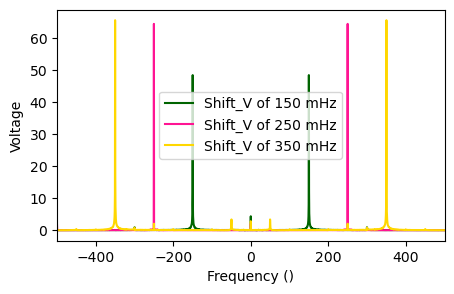

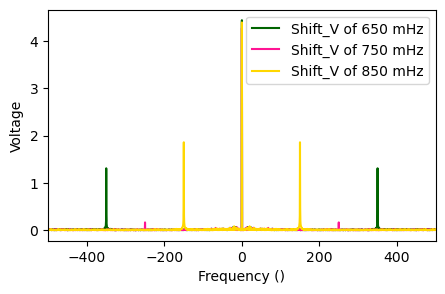

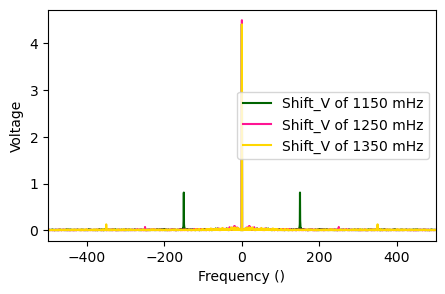

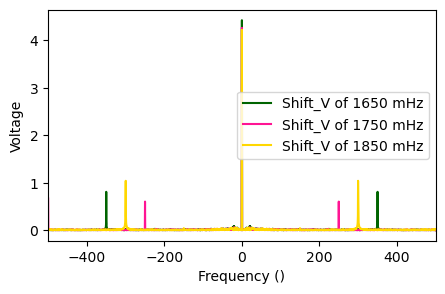

In [48]:
# Shifted Voltage Spectrum

dt = 1 / sample_rate

# Zone 0
Shift_Xf_150 = np.fft.fftshift(Xf_150) # Frequency bins
Shift_freq150 = np.fft.fftshift(freq150) # Generates frequency values in each bin in Xf

Shift_Xf_250 = np.fft.fftshift(Xf_250)
Shift_freq250 = np.fft.fftshift(freq250)

Shift_Xf_350 = np.fft.fftshift(Xf_350)
Shift_freq350 = np.fft.fftshift(freq350)

# Zone 1
Shift_Xf_650 = np.fft.fftshift(Xf_650)
Shift_freq650 = np.fft.fftshift(freq650)

Shift_Xf_750 = np.fft.fftshift(Xf_750)
Shift_freq750 = np.fft.fftshift(freq750)

Shift_Xf_850 = np.fft.fftshift(Xf_850)
Shift_freq850 = np.fft.fftshift(freq850)

# Zone 2
Shift_Xf_1150 = np.fft.fftshift(Xf_1150) # Frequency bins
Shift_freq1150 = np.fft.fftshift(freq1150) # Generates frequency values in each bin in Xf

Shift_Xf_1250 = np.fft.fftshift(Xf_1250)
Shift_freq1250 = np.fft.fftshift(freq1250)

Shift_Xf_1350 = np.fft.fftshift(Xf_1350)
Shift_freq1350 = np.fft.fftshift(freq1350)

# Zone 3
Shift_Xf_1650 = np.fft.fftshift(Xf_1650)
Shift_freq1650 = np.fft.fftshift(freq1650)

Shift_Xf_1750 = np.fft.fftshift(Xf_1750)
Shift_freq1750 = np.fft.fftshift(freq1750)

Shift_Xf_1850 = np.fft.fftshift(Xf_1850)
Shift_freq1850 = np.fft.fftshift(freq1850)

# Computing voltage, the magnitude of each frequency bin
Shift_V_150 = np.abs(Shift_Xf_150) / len(Z0_150[1])
Shift_V_250 = np.abs(Shift_Xf_250) / len(Z0_250[1])
Shift_V_350 = np.abs(Shift_Xf_350) / len(Z0_350[1])

Shift_V_650 = np.abs(Shift_Xf_650) / len(Z1_650[1])
Shift_V_750 = np.abs(Shift_Xf_750) / len(Z1_750[1])
Shift_V_850 = np.abs(Shift_Xf_850) / len(Z1_850[1])

Shift_V_1150 = np.abs(Shift_Xf_1150) / len(Z2_1150[1])
Shift_V_1250 = np.abs(Shift_Xf_1250) / len(Z2_1250[1])
Shift_V_1350 = np.abs(Shift_Xf_1350) / len(Z2_1350[1])

Shift_V_1650 = np.abs(Shift_Xf_1650) / len(Z3_1650[1])
Shift_V_1750 = np.abs(Shift_Xf_1750) / len(Z3_1750[1])
Shift_V_1850 = np.abs(Shift_Xf_1850) / len(Z3_1850[1])

plt.figure(figsize=(5,3))
plt.plot(Shift_freq150 / 1e3, # Converting Hz to kilo Hz
         Shift_V_150, color='darkgreen', label="Shift_V of 150 mHz")
plt.plot(Shift_freq250 / 1e3, Shift_V_250, color='deeppink', label="Shift_V of 250 mHz")
plt.plot(Shift_freq350 / 1e3, Shift_V_350, color='gold', label="Shift_V of 350 mHz")
plt.xlabel('Frequency ()')
plt.ylabel('Voltage')
plt.xlim(-500,500)
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(Shift_freq650 / 1e3, Shift_V_650, color='darkgreen', label="Shift_V of 650 mHz")
plt.plot(Shift_freq750 / 1e3, Shift_V_750, color='deeppink', label="Shift_V of 750 mHz")
plt.plot(Shift_freq850 / 1e3, Shift_V_850, color='gold', label="Shift_V of 850 mHz")
plt.xlabel('Frequency ()')
plt.ylabel('Voltage')
plt.xlim(-500,500)
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(Shift_freq1150 / 1e3, Shift_V_1150, color='darkgreen', label="Shift_V of 1150 mHz")
plt.plot(Shift_freq1250 / 1e3, Shift_V_1250, color='deeppink', label="Shift_V of 1250 mHz")
plt.plot(Shift_freq1350 / 1e3, Shift_V_1350, color='gold', label="Shift_V of 1350 mHz")
plt.xlabel('Frequency ()')
plt.ylabel('Voltage')
plt.xlim(-500,500)
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(Shift_freq1650 / 1e3, Shift_V_1650, color='darkgreen', label="Shift_V of 1650 mHz")
plt.plot(Shift_freq1750 / 1e3, Shift_V_1750, color='deeppink', label="Shift_V of 1750 mHz")
plt.plot(Shift_freq1850 / 1e3, Shift_V_1850, color='gold', label="Shift_V of 1850 mHz")
plt.xlabel('Frequency ()')
plt.ylabel('Voltage')
plt.xlim(-500,500)
plt.legend()
plt.show()

In [49]:
# # NEED TO NORMALIZE AND FIX DATA

# # Complex Voltage Spectrum

# # Nyquist Zone 0
# plt.figure(figsize=(5,3))

# plt.plot(Shift_freq150 / 1e3, np.real((Shift_Xf_150) / len(Z0_150[1])), color='darkgreen')
# plt.plot(Shift_freq250 / 1e3, np.real((Shift_Xf_250) / len(Z0_250[1])), color='deeppink')
# plt.plot(Shift_freq350 / 1e3, np.real((Shift_Xf_350) / len(Z0_350[1])), color='gold')

# plt.plot(Shift_freq150 / 1e3, np.imag((Shift_Xf_150) / len(Z0_150[1])), color='darkgreen', linestyle=':')
# plt.plot(Shift_freq250 / 1e3, np.imag((Shift_Xf_250) / len(Z0_250[1])), color='deeppink', linestyle=':')
# plt.plot(Shift_freq350 / 1e3, np.imag((Shift_Xf_350) / len(Z0_350[1])), color='gold', linestyle=':')

# plt.xlabel('Frequency (kHz)')
# plt.ylabel('Voltage')
# # plt.xlim(-1500,1500)
# # plt.legend()
# plt.show()

# # Nyquist Zone 1
# plt.figure(figsize=(5,3))

# plt.plot(Shift_freq650 / 1e3, np.real((Shift_Xf_650) / len(Z1_650[1])), color='darkgreen')
# plt.plot(Shift_freq750 / 1e3, np.real((Shift_Xf_750) / len(Z1_750[1])), color='deeppink')
# plt.plot(Shift_freq850 / 1e3, np.real((Shift_Xf_850) / len(Z1_850[1])), color='gold')

# plt.plot(Shift_freq650 / 1e3, np.imag((Shift_Xf_650) / len(Z1_650[1])), color='darkgreen', linestyle=':')
# plt.plot(Shift_freq750 / 1e3, np.imag((Shift_Xf_750) / len(Z1_750[1])), color='deeppink', linestyle=':')
# plt.plot(Shift_freq850 / 1e3, np.real((Shift_Xf_850) / len(Z1_850[1])), color='gold')

# plt.xlabel('Frequency (kHz)')
# plt.ylabel('Voltage')
# # plt.xlim(-1500,1500)
# # plt.legend()
# plt.show()

# # Nyquist Zone 2
# plt.figure(figsize=(5,3))

# plt.plot(Shift_freq1150 / 1e3, np.real((Shift_Xf_1150) / len(Z2_1150[1])), color='darkgreen')
# plt.plot(Shift_freq1250 / 1e3, np.real((Shift_Xf_1250) / len(Z2_1250[1])), color='deeppink')
# plt.plot(Shift_freq1350 / 1e3, np.real((Shift_Xf_1350) / len(Z2_1350[1])), color='gold')

# plt.plot(Shift_freq1150 / 1e3, np.imag((Shift_Xf_1150) / len(Z2_1150[1])), color='darkgreen', linestyle=':')
# plt.plot(Shift_freq1250 / 1e3, np.imag((Shift_Xf_1250) / len(Z2_1250[1])), color='deeppink', linestyle=':')
# plt.plot(Shift_freq1350 / 1e3, np.imag((Shift_Xf_1350) / len(Z2_1350[1])), color='gold', linestyle=':')

# plt.xlabel('Frequency (kHz)')
# plt.ylabel('Voltage')
# # plt.xlim(-1500,1500)
# # plt.legend()
# plt.show()

# # Nyquist Zone 3
# plt.figure(figsize=(5,3))

# plt.plot(Shift_freq1650 / 1e3, np.real((Shift_Xf_1650) / len(Z3_1650[1])), color='darkgreen')
# plt.plot(Shift_freq1750 / 1e3, np.real((Shift_Xf_1750) / len(Z3_1750[1])), color='deeppink')
# plt.plot(Shift_freq1850 / 1e3, np.real((Shift_Xf_1850) / len(Z3_1850[1])), color='gold')

# plt.plot(Shift_freq1650 / 1e3, np.imag((Shift_Xf_1650) / len(Z3_1650[1])), color='darkgreen', linestyle=':')
# plt.plot(Shift_freq1750 / 1e3, np.imag((Shift_Xf_1750) / len(Z3_1750[1])), color='deeppink', linestyle=':')
# plt.plot(Shift_freq1850 / 1e3, np.imag((Shift_Xf_1850) / len(Z3_1850[1])), color='gold', linestyle=':')

# plt.xlabel('Frequency (kHz)')
# plt.ylabel('Voltage')
# # plt.xlim(-1500,1500)
# # plt.legend()
# plt.show()

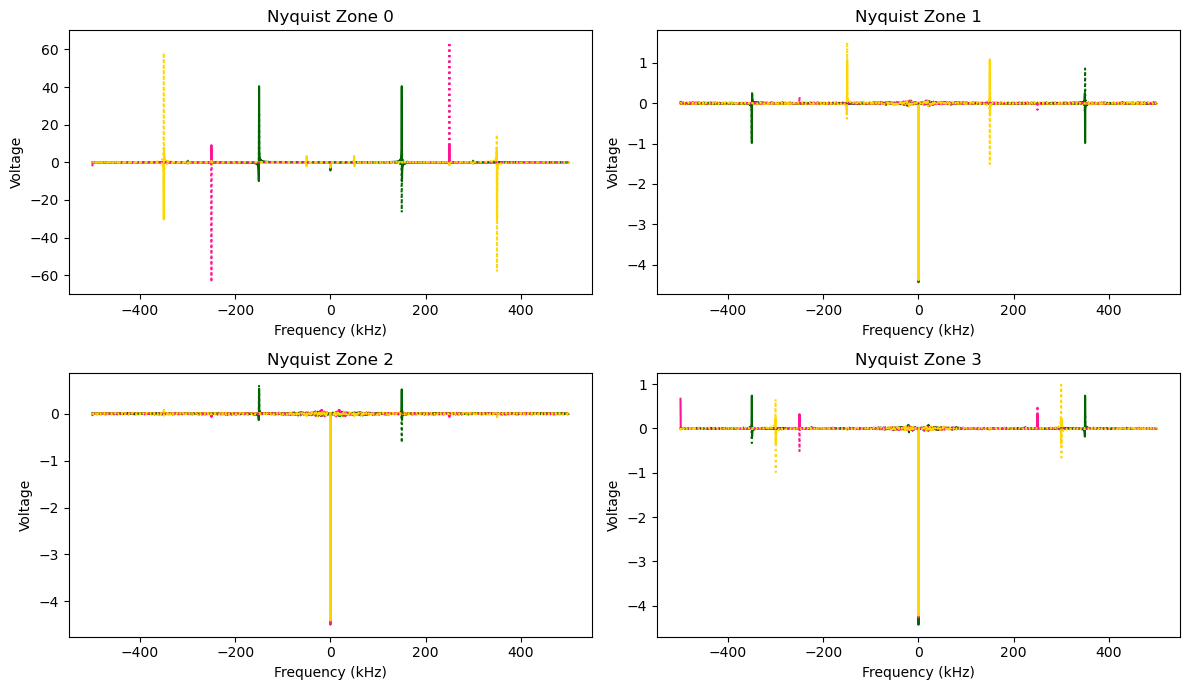

In [50]:
# NEED TO NORMALIZE AND FIX DATA
# Complex Voltage Spectrum (Normalized)

fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]

ax.plot(Shift_freq150 / 1e3, np.real((Shift_Xf_150) / len(Z0_150[1])), color='darkgreen')
ax.plot(Shift_freq250 / 1e3, np.real((Shift_Xf_250) / len(Z0_250[1])), color='deeppink')
ax.plot(Shift_freq350 / 1e3, np.real((Shift_Xf_350) / len(Z0_350[1])), color='gold')

ax.plot(Shift_freq150 / 1e3, np.imag((Shift_Xf_150) / len(Z0_150[1])), color='darkgreen', linestyle=':')
ax.plot(Shift_freq250 / 1e3, np.imag((Shift_Xf_250) / len(Z0_250[1])), color='deeppink', linestyle=':')
ax.plot(Shift_freq350 / 1e3, np.imag((Shift_Xf_350) / len(Z0_350[1])), color='gold', linestyle=':')

ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Voltage')
ax.set_title('Nyquist Zone 0')

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]

ax.plot(Shift_freq650 / 1e3, np.real((Shift_Xf_650) / len(Z1_650[1])), color='darkgreen')
ax.plot(Shift_freq750 / 1e3, np.real((Shift_Xf_750) / len(Z1_750[1])), color='deeppink')
ax.plot(Shift_freq850 / 1e3, np.real((Shift_Xf_850) / len(Z1_850[1])), color='gold')

ax.plot(Shift_freq650 / 1e3, np.imag((Shift_Xf_650) / len(Z1_650[1])), color='darkgreen', linestyle=':')
ax.plot(Shift_freq750 / 1e3, np.imag((Shift_Xf_750) / len(Z1_750[1])), color='deeppink', linestyle=':')
ax.plot(Shift_freq850 / 1e3, np.imag((Shift_Xf_850) / len(Z1_850[1])), color='gold', linestyle=':')

ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Voltage')
ax.set_title('Nyquist Zone 1')

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]

ax.plot(Shift_freq1150 / 1e3, np.real((Shift_Xf_1150) / len(Z2_1150[1])), color='darkgreen')
ax.plot(Shift_freq1250 / 1e3, np.real((Shift_Xf_1250) / len(Z2_1250[1])), color='deeppink')
ax.plot(Shift_freq1350 / 1e3, np.real((Shift_Xf_1350) / len(Z2_1350[1])), color='gold')

ax.plot(Shift_freq1150 / 1e3, np.imag((Shift_Xf_1150) / len(Z2_1150[1])), color='darkgreen', linestyle=':')
ax.plot(Shift_freq1250 / 1e3, np.imag((Shift_Xf_1250) / len(Z2_1250[1])), color='deeppink', linestyle=':')
ax.plot(Shift_freq1350 / 1e3, np.imag((Shift_Xf_1350) / len(Z2_1350[1])), color='gold', linestyle=':')

ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Voltage')
ax.set_title('Nyquist Zone 2')

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]

ax.plot(Shift_freq1650 / 1e3, np.real((Shift_Xf_1650) / len(Z3_1650[1])), color='darkgreen')
ax.plot(Shift_freq1750 / 1e3, np.real((Shift_Xf_1750) / len(Z3_1750[1])), color='deeppink')
ax.plot(Shift_freq1850 / 1e3, np.real((Shift_Xf_1850) / len(Z3_1850[1])), color='gold')

ax.plot(Shift_freq1650 / 1e3, np.imag((Shift_Xf_1650) / len(Z3_1650[1])), color='darkgreen', linestyle=':')
ax.plot(Shift_freq1750 / 1e3, np.imag((Shift_Xf_1750) / len(Z3_1750[1])), color='deeppink', linestyle=':')
ax.plot(Shift_freq1850 / 1e3, np.imag((Shift_Xf_1850) / len(Z3_1850[1])), color='gold', linestyle=':')

ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Voltage')
ax.set_title('Nyquist Zone 3')

plt.tight_layout()
plt.show()

In [51]:
# # NEED TO NORMALIZE AND FIX DATA

# # Plotting the Real and Imaginary Parts Together at 850mHz
# plt.figure(figsize=(12,10))
# plt.plot(Shift_freq150 / 1e3, np.real((Shift_Xf_150) / len(Z0_150[1])), color='darkgreen', linestyle=':')
# plt.plot(Shift_freq150 / 1e3, np.imag((Shift_Xf_150) / len(Z0_150[1])), color='deeppink')

# plt.xlabel('Frequency ()')
# plt.ylabel('Voltage')

# plt.xlim(-350,350)
# # plt.legend()
# plt.show()

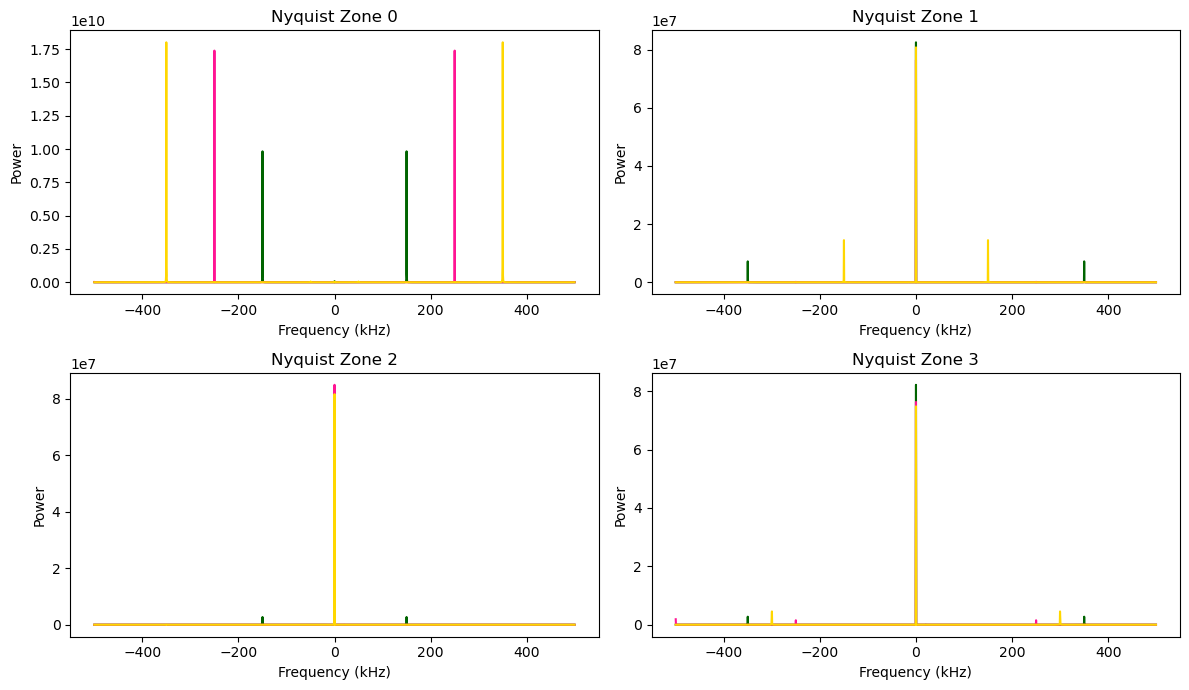

In [52]:
# Power Spectrum
# Computing power, the magnitude squared of each frequency bin

Shift_P_150  = np.abs(Shift_Xf_150)**2
Shift_P_250  = np.abs(Shift_Xf_250)**2
Shift_P_350  = np.abs(Shift_Xf_350)**2

Shift_P_650  = np.abs(Shift_Xf_650)**2
Shift_P_750  = np.abs(Shift_Xf_750)**2
Shift_P_850  = np.abs(Shift_Xf_850)**2

Shift_P_1150 = np.abs(Shift_Xf_1150)**2
Shift_P_1250 = np.abs(Shift_Xf_1250)**2
Shift_P_1350 = np.abs(Shift_Xf_1350)**2

Shift_P_1650 = np.abs(Shift_Xf_1650)**2
Shift_P_1750 = np.abs(Shift_Xf_1750)**2
Shift_P_1850 = np.abs(Shift_Xf_1850)**2


fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(Shift_freq150 / 1e3, Shift_P_150, color='darkgreen')
ax.plot(Shift_freq250 / 1e3, Shift_P_250, color='deeppink')
ax.plot(Shift_freq350 / 1e3, Shift_P_350, color='gold')
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Power')
ax.set_title('Nyquist Zone 0')

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(Shift_freq650 / 1e3, Shift_P_650, color='darkgreen')
ax.plot(Shift_freq750 / 1e3, Shift_P_750, color='deeppink')
ax.plot(Shift_freq850 / 1e3, Shift_P_850, color='gold')
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Power')
ax.set_title('Nyquist Zone 1')

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(Shift_freq1150 / 1e3, Shift_P_1150, color='darkgreen')
ax.plot(Shift_freq1250 / 1e3, Shift_P_1250, color='deeppink')
ax.plot(Shift_freq1350 / 1e3, Shift_P_1350, color='gold')
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Power')
ax.set_title('Nyquist Zone 2')

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(Shift_freq1650 / 1e3, Shift_P_1650, color='darkgreen')
ax.plot(Shift_freq1750 / 1e3, Shift_P_1750, color='deeppink')
ax.plot(Shift_freq1850 / 1e3, Shift_P_1850, color='gold')
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Power')
ax.set_title('Nyquist Zone 3')

plt.tight_layout()
plt.show()

In [1]:
# Fourier Transform of a power series
# Inverse Fourier Transformation

# We want to use the UNSHIFTED data for our inverse fourier transform! So I am redefining the parameters
P_150  = np.abs(Xf_150)**2
P_250  = np.abs(Xf_250)**2
P_350  = np.abs(Xf_350)**2

P_650  = np.abs(Xf_650)**2
P_750  = np.abs(Xf_750)**2
P_850  = np.abs(Xf_850)**2

P_1150 = np.abs(Xf_1150)**2
P_1250 = np.abs(Xf_1250)**2
P_1350 = np.abs(Xf_1350)**2

P_1650 = np.abs(Xf_1650)**2
P_1750 = np.abs(Xf_1750)**2
P_1850 = np.abs(Xf_1850)**2

InverseFT_150 = np.fft.ifft(P_150)
InverseFT_250 = np.fft.ifft(P_250)
InverseFT_350 = np.fft.ifft(P_350)

InverseFT_650 = np.fft.ifft(P_650)
InverseFT_750 = np.fft.ifft(P_750)
InverseFT_850 = np.fft.ifft(P_850)

InverseFT_1150 = np.fft.ifft(P_1150)
InverseFT_1250 = np.fft.ifft(P_1250)
InverseFT_1350 = np.fft.ifft(P_1350)

InverseFT_1650 = np.fft.ifft(P_1650)
InverseFT_1750 = np.fft.ifft(P_1750)
InverseFT_1850 = np.fft.ifft(P_1850)

plt.figure(figsize=(5,3))
plt.plot(t_Z0_150*1000, InverseFT_150, color='darkgreen')
plt.plot(t_Z0_250*1000, InverseFT_250, color='deeppink')
plt.plot(t_Z0_350*1000, InverseFT_350, color='gold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,0.01)
# plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(t_Z1_650*1000, InverseFT_650, color='darkgreen')
plt.plot(t_Z1_750*1000, InverseFT_750, color='deeppink')
plt.plot(t_Z1_850*1000, InverseFT_850, color='gold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,0.01)
# plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(t_Z2_1150*1000, InverseFT_1150, color='darkgreen')
plt.plot(t_Z2_1250*1000, InverseFT_1250, color='deeppink')
plt.plot(t_Z2_1350*1000, InverseFT_1350, color='gold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,0.01)
# plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(t_Z3_1650*1000, InverseFT_1650, color='darkgreen')
plt.plot(t_Z3_1750*1000, InverseFT_1750, color='deeppink')
plt.plot(t_Z3_1850*1000, InverseFT_1850, color='gold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,0.01)
# plt.legend()
plt.show()

NameError: name 'np' is not defined

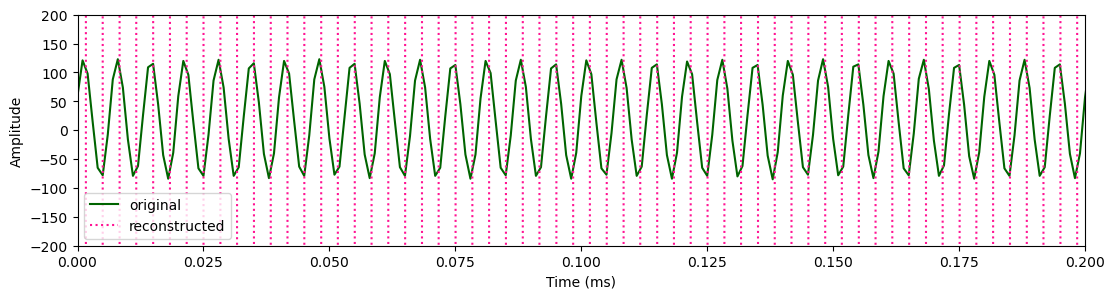

In [105]:
plt.figure(figsize=(13,3))
plt.plot(t_Z0_150*1000, Z0_150[1] + 24, color='darkgreen', label="original")
plt.plot(t_Z0_150*1000, InverseFT_150, color='deeppink', label="reconstructed", linestyle=':')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.xlim(0,0.2)
plt.ylim(-200,200)
plt.legend()
plt.show()

# plt.figure(figsize=(13,3))
# plt.plot(t_Z1_650*1000, Z1_650[1] + 24, color='darkgreen', label="original")
# plt.plot(t_Z1_650*1000, InverseFT_650, color='deeppink', label="reconstructed", linestyle=':')
# plt.xlabel('Time (ms)')
# plt.ylabel('Amplitude')
# plt.xlim(0,0.2)
# plt.legend()
# plt.show()

# plt.figure(figsize=(13,3))
# plt.plot(t_Z2_1150*1000, Z2_1150[1] + 24, color='darkgreen', label="original")
# plt.plot(t_Z2_1150*1000, InverseFT_1150, color='deeppink', label="reconstructed", linestyle=':')
# plt.xlabel('Time (ms)')
# plt.ylabel('Amplitude')
# plt.xlim(0,0.2)
# plt.legend()
# plt.show()

# plt.figure(figsize=(13,3))
# plt.plot(t_Z3_1650*1000, Z3_1650[1] + 24, color='darkgreen', label="original")
# plt.plot(t_Z3_1650*1000, InverseFT_1650, color='deeppink', label="reconstructed", linestyle=':')
# plt.xlabel('Time (ms)')
# plt.ylabel('Amplitude')
# plt.xlim(0,0.2)
# plt.legend()
# plt.show()

In [3]:
# Fourier Transform of a power series
# Inverse Fourier Transformation

# We want to use the UNSHIFTED data for our inverse fourier transform! So I am redefining the parameters

# ———————————————————— Nyquist Zone 0 ————————————————————
P_150  = np.abs(Xf_150)**2
P_250  = np.abs(Xf_250)**2
P_350  = np.abs(Xf_350)**2

InverseFT_150 = np.fft.ifft(P_150)
InverseFT_250 = np.fft.ifft(P_250)
InverseFT_350 = np.fft.ifft(P_350)

# ———————————————————— Nyquist Zone 1 ————————————————————
P_650  = np.abs(Xf_650)**2
P_750  = np.abs(Xf_750)**2
P_850  = np.abs(Xf_850)**2

InverseFT_650 = np.fft.ifft(P_650)
InverseFT_750 = np.fft.ifft(P_750)
InverseFT_850 = np.fft.ifft(P_850)

# ———————————————————— Nyquist Zone 2 ————————————————————
P_1150 = np.abs(Xf_1150)**2
P_1250 = np.abs(Xf_1250)**2
P_1350 = np.abs(Xf_1350)**2

InverseFT_1150 = np.fft.ifft(P_1150)
InverseFT_1250 = np.fft.ifft(P_1250)
InverseFT_1350 = np.fft.ifft(P_1350)

# ———————————————————— Nyquist Zone 3 ————————————————————
P_1650 = np.abs(Xf_1650)**2
P_1750 = np.abs(Xf_1750)**2
P_1850 = np.abs(Xf_1850)**2

InverseFT_1650 = np.fft.ifft(P_1650)
InverseFT_1750 = np.fft.ifft(P_1750)
InverseFT_1850 = np.fft.ifft(P_1850)



fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True, sharey=True)

# ---------------- Nyquist Zone 0 ----------------
ax = axes[0, 0]
ax.plot(t_Z0_150*1000, InverseFT_150, color='darkgreen')
ax.plot(t_Z0_250*1000, InverseFT_250, color='deeppink')
ax.plot(t_Z0_350*1000, InverseFT_350, color='gold')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(0, 0.01)

# ---------------- Nyquist Zone 1 ----------------
ax = axes[0, 1]
ax.plot(t_Z1_650*1000, InverseFT_650, color='darkgreen')
ax.plot(t_Z1_750*1000, InverseFT_750, color='deeppink')
ax.plot(t_Z1_850*1000, InverseFT_850, color='gold')
ax.set_title('Nyquist Zone 1')
ax.set_xlim(0, 0.01)

# ---------------- Nyquist Zone 2 ----------------
ax = axes[1, 0]
ax.plot(t_Z2_1150*1000, InverseFT_1150, color='darkgreen')
ax.plot(t_Z2_1250*1000, InverseFT_1250, color='deeppink')
ax.plot(t_Z2_1350*1000, InverseFT_1350, color='gold')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(0, 0.01)

# ---------------- Nyquist Zone 3 ----------------
ax = axes[1, 1]
ax.plot(t_Z3_1650*1000, InverseFT_1650, color='darkgreen')
ax.plot(t_Z3_1750*1000, InverseFT_1750, color='deeppink')
ax.plot(t_Z3_1850*1000, InverseFT_1850, color='gold')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(0, 0.01)

# -------- Global labels --------
fig.supxlabel('Time (ms)')
fig.supylabel('Amplitude')

plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

NameError: name 'np' is not defined

In [55]:
Voltage_150 = Voltage_150 - np.mean(Voltage_150)
N = len(Voltage_150)
N_pad = (2 * N) - 1

ACF = np.correlate(Voltage_150, Voltage_150, mode='full')
ACF /= ACF[len(ACF)//2]

V_pad = np.zeros(N_pad, dtype=complex)
V_pad[:N] = Voltage_150

Power = np.abs((np.fft.fft(V_pad))**2)
ACF_powspec = np.fft.ifft(Power).real
ACF_powspec = np.fft.fftshift(ACF_powspec)
ACF_powspec /= ACF_powspec[0]

lags = np.arange(-(N-1), N) / sample_rate

plt.figure(figsize=(10,5))
plt.plot(lags*1e3, ACF, color='darkgreen', label="direct")
plt.plot(lags*1e3, ACF_powspec, color='pink', label="fft")
# plt.xlim(-2,2)
plt.legend
plt.show()

NameError: name 'Voltage_150' is not defined